In [1]:
import pandas as pd

### 1. Load and Display Data → Read the dataset and print the first 5 rows

In [4]:
df = pd.read_csv('covid_19_country_wise_latest.csv')
df.head()

,Unnamed: 0,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


### 2. Set the Dataset index is Unnamed: 0

In [7]:
df.set_index("Unnamed: 0", inplace=True)
df.index.name = "index"
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
index,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


### 3. Replace Whitespace in Column Names with Underscores

In [10]:
def clean_column_names(dataframe):
    dataframe.columns = dataframe.columns.str.replace(" ", "_")
    return dataframe
df = clean_column_names(df)
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region'],
      dtype='object')

### 4. Check Basic Information → Find column names, data types, and missing values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    object 
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New_cases               177 non-null    float64
 6   New_deaths              177 non-null    float64
 7   New_recovered           187 non-null    int64  
 8   Deaths_/_100_Cases      187 non-null    float64
 9   Recovered_/_100_Cases   187 non-null    float64
 10  Deaths_/_100_Recovered  187 non-null    float64
 11  Confirmed_last_week     187 non-null    int64  
 12  1_week_change           187 non-null    int64  
 13  1_week_%_increase       187 non-null    float64
 14  WHO_Region              187 non-null    object 

### 5. fill the nan values with the mean of the column

In [16]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New_cases                 0
New_deaths                0
New_recovered             0
Deaths_/_100_Cases        0
Recovered_/_100_Cases     0
Deaths_/_100_Recovered    0
Confirmed_last_week       0
1_week_change             0
1_week_%_increase         0
WHO_Region                0
dtype: int64

### 6. Count the number of unique countries in the dataset

In [19]:
unique_countries = df["Country/Region"].nunique()
print(unique_countries)

187


### 7. Check if there are any duplicate country entries and remove them if  needed

In [22]:
duplicate_countries = df["Country/Region"].duplicated().sum()
df.drop_duplicates(subset=["Country/Region"], keep="first", inplace=True)
unique_countries_after_cleanup = df["Country/Region"].nunique()
print(duplicate_countries) 
print(unique_countries_after_cleanup)

0
187


### 8. Find the mean, median, and standard deviation of total cases.

In [25]:
mean_cases = df["Confirmed"].mean()
median_cases = df["Confirmed"].median()
std_cases = df["Confirmed"].std()
print(mean_cases)
print(median_cases)
print(std_cases)

88130.935828877
5059.0
383318.66383061546


### 9. Find out the string in Deaths Column and replace it with the mean of Deaths column.

In [28]:
df["Deaths"] = pd.to_numeric(df["Deaths"], errors="coerce")
df["Deaths"].fillna(df["Deaths"].mean(), inplace=True)
df["Deaths"].dtype, df["Deaths"].isnull().sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8536\2650654287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Deaths"].fillna(df["Deaths"].mean(), inplace=True)


(dtype('float64'), 0)

### 10. Change the datatype of column Death

In [31]:
df["Deaths"] = pd.to_numeric(df["Deaths"], errors="coerce")
df["Deaths"].dtype

dtype('float64')

### 11. Calculate total number of Death and Recovery all over the world`

In [34]:
total_deaths = df["Deaths"].sum()
total_recoveries = df["Recovered"].sum()
print(total_deaths)
print(total_recoveries)

657516.1290322581
9468087


### 12. How many countries have more than 1 million total cases

In [37]:
countries_over_million_cases = df[df["Confirmed"] > 1_000_000]["Country/Region"].count()
print(countries_over_million_cases)

3


### 13. Which countries have a recovery rate (Recovered / Total Cases) above 95%

In [40]:
df["Recovery_Rate"] = (df["Recovered"] / df["Confirmed"]) * 100
high_recovery_countries = df[df["Recovery_Rate"] > 95][["Country/Region", "Recovery_Rate"]]
print(high_recovery_countries)

      Country/Region  Recovery_Rate
index                              
24            Brunei      97.872340
48          Djibouti      98.379126
49          Dominica     100.000000
69           Grenada     100.000000
75          Holy See     100.000000
78           Iceland      98.327940
105         Malaysia      96.597035
110        Mauritius      96.511628
121      New Zealand      97.238279
126           Norway      95.838809
136            Qatar      97.017254
164          Taiwan*      95.238095


### 14. Drop columns name WHO Region and Confirmed

In [43]:
df.drop(columns=["WHO_Region", "Confirmed"], inplace=True)
df.columns

Index(['Country/Region', 'Deaths', 'Recovered', 'Active', 'New_cases',
       'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'Recovery_Rate'],
      dtype='object')

### 15. Find the Country with the Max Deaths

In [46]:
max_deaths_country = df[df["Deaths"] == df["Deaths"].max()][["Country/Region", "Deaths"]]
print(max_deaths_country)

      Country/Region    Deaths
index                         
173               US  148011.0


### 16. Sort Countries by Deaths (Descending Order)

In [49]:
sorted_by_deaths = df.sort_values(by="Deaths", ascending=False)[["Country/Region", "Deaths"]]
print(sorted_by_deaths.head(10))

       Country/Region    Deaths
index                          
173                US  148011.0
23             Brazil   87618.0
177    United Kingdom   45844.0
111            Mexico   44022.0
85              Italy   35112.0
79              India   33408.0
61             France   30212.0
157             Spain   28432.0
132              Peru   18418.0
81               Iran   15912.0


### 17. Make new column name Total_cases that have a sum of Deaths, Recovered , Active

In [52]:
df["Total_cases"] = df["Deaths"] + df["Recovered"] + df["Active"]
print(df[["Country/Region", "Total_cases"]].head())

      Country/Region  Total_cases
index                            
0        Afghanistan      36263.0
1            Albania       4880.0
2            Algeria      27973.0
3            Andorra        907.0
4             Angola        950.0


### 18. Calculate Death_Rate for Each Country (Deaths per Total Cases) by suing formula (Desths/Total_cases)*100 and save it in Dath_Rate column

In [55]:
df["Death_Rate"] = (df["Deaths"] / df["Total_cases"]) * 100
print(df[["Country/Region", "Death_Rate"]].head())

      Country/Region  Death_Rate
index                           
0        Afghanistan    3.499435
1            Albania    2.950820
2            Algeria    4.157581
3            Andorra    5.733186
4             Angola    4.315789


### 19. Identify countries where total cases are increasing but death rates remain low.

In [58]:
global_avg_death_rate = df["Death_Rate"].mean()
increasing_cases_low_death_rate = df[
    (df["1_week_change"] > 0) & (df["Death_Rate"] < global_avg_death_rate)
][["Country/Region", "1_week_change", "Death_Rate"]]
print(increasing_cases_low_death_rate.head(10))

      Country/Region  1_week_change  Death_Rate
index                                          
1            Albania            709    2.950820
6          Argentina          36642    1.827185
7            Armenia           2409    1.901578
8          Australia           2875    1.091289
10        Azerbaijan           2556    1.389345
11           Bahamas            208    2.879581
12           Bahrain           2546    0.357125
13        Bangladesh          18772    1.310642
15           Belarus           1038    0.799988
18             Benin            168    1.977401


### 20. print head of only 2 columns Country/Region and Death_Rate

In [61]:
print(df[["Country/Region", "Death_Rate"]].head(10))

            Country/Region  Death_Rate
index                                 
0              Afghanistan    3.499435
1                  Albania    2.950820
2                  Algeria    4.157581
3                  Andorra    5.733186
4                   Angola    4.315789
5      Antigua and Barbuda    3.488372
6                Argentina    1.827185
7                  Armenia    1.901578
8                Australia    1.091289
9                  Austria    3.468236


### 21. Create a scatter plot comparing total cases and total deaths.

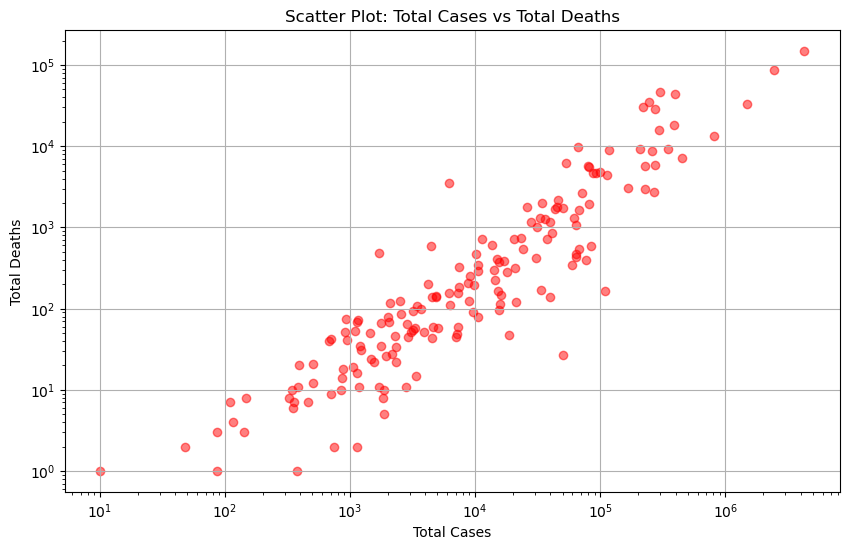

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df["Total_cases"], df["Deaths"], alpha=0.5, color='red')
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.title("Scatter Plot: Total Cases vs Total Deaths")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.show()

### 22. Save dataset in CSV format

In [ ]:

# Save the dataset in CSV format
output_file_path = "covid_19_processed.csv"
df.to_csv(output_file_path, index=False)
print(f"Dataset saved successfully as {output_file_path}")
